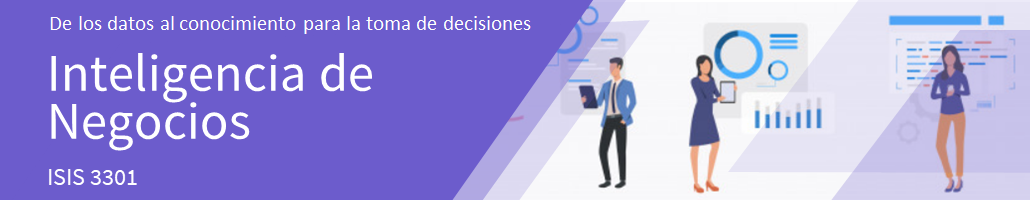

## Laboratorio 4
## Limpieza y preparación de datos

En este notebook se realiza el perfilamento de los archivos recibidos para limpiar o transformar datos que puedan generar conflictos en el proceso.
Se debe tener cuidado a la hora de eliminar filas de los archivos CSV puesto que pueden afectar las dependencias entre llaves foráneas existentes de la BD.

1. Importación de librerías.
2. Perfilamiento, limpieza y visualización de los datos city de muestra.
3. Perfilamiento, limpieza y visualización de los datos customer.
4. Perfilamiento, limpieza y visualización de los datos date.
5. Perfilamiento, limpieza y visualización de los datos employee.
6. Perfilamiento, limpieza y visualización de los datos stock_item.
7. Perfilamiento, limpieza y visualización de los datos fact_order de muestra.

### 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías para la limpieza de datos.

In [1]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 

In [2]:
# CAMBIAR LA RUTA SEGÚN SEA NECESARIO
# Dejar vacio si está en la misma carpeta
ruta = './Lab4/Muestra/'

### 2. Perfilamiento, limpieza y visualización de los datos city de muestra.
A través de la librería pandas resalizamos la carga de datos del archivo "/Lab4/Muestra/dimension_city.csv".

Se debe tener en cuenta no eliminar filas de City_Key o City ya que estas son llaves foráneas.

In [3]:
# Se cargan los datos. 
df=pd.read_csv(ruta + 'dimension_city.csv')

In [4]:
# Cantidad de datos y número de variables
df.shape

(98, 10)

In [5]:
df.dtypes

row ID                        object
City_Key                       int64
City                          object
State_Province                object
Country                       object
Continent                     object
Sales_Territory               object
Region                        object
Subregion                     object
Latest_Recorded_Population     int64
dtype: object

Se tienen como datos numéricos City_Key y Latest_Recorded_Population, el resto es texto.

In [6]:
# Mostrar los datos
df.head()

,row ID,City_Key,City,State_Province,Country,Continent,Sales_Territory,Region,Subregion,Latest_Recorded_Population
0,Row0,0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Row1,1,Carrollton,New York,United States,North America,Mideast,Americas,Northern America,0
2,Row2,2,Carrollton,Virginia,United States,North America,Southeast,Americas,Northern America,4574
3,Row3,3,Carrollton,Illinois,United States,North America,Great Lakes,Americas,Northern America,2484
4,Row4,4,Carrollton,Missouri,United States,North America,Plains,Americas,Northern America,3784


In [7]:
# Se elimina la primera columna ya que no se usa y la primera fila que esta llena de nulos.
df.columns = df.columns.str.replace(' ', '')
df = df.drop(['rowID'], axis=1)
df = df.drop([0])
df.head()

,City_Key,City,State_Province,Country,Continent,Sales_Territory,Region,Subregion,Latest_Recorded_Population
1,1,Carrollton,New York,United States,North America,Mideast,Americas,Northern America,0
2,2,Carrollton,Virginia,United States,North America,Southeast,Americas,Northern America,4574
3,3,Carrollton,Illinois,United States,North America,Great Lakes,Americas,Northern America,2484
4,4,Carrollton,Missouri,United States,North America,Plains,Americas,Northern America,3784
5,5,Carrollton,Ohio,United States,North America,Great Lakes,Americas,Northern America,3241


In [8]:
# Resumen de los datos numéricos, city key es un id entonces no sirve describirlo
df['Latest_Recorded_Population'].describe()

count        97.000000
mean      22894.020619
std      104224.974961
min           0.000000
25%          10.000000
50%         808.000000
75%        3940.000000
max      790390.000000
Name: Latest_Recorded_Population, dtype: float64

Ahora se revisan las columnas Country, Continent, Region y Subregion.

In [9]:
df['Country'].value_counts()

United States    97
Name: Country, dtype: int64

In [10]:
df['Continent'].value_counts()

North America    97
Name: Continent, dtype: int64

In [11]:
df['Region'].value_counts()

Americas    97
Name: Region, dtype: int64

In [12]:
df['Subregion'].value_counts()

Northern America    97
Name: Subregion, dtype: int64

Ahora se crea una visualización de los datos

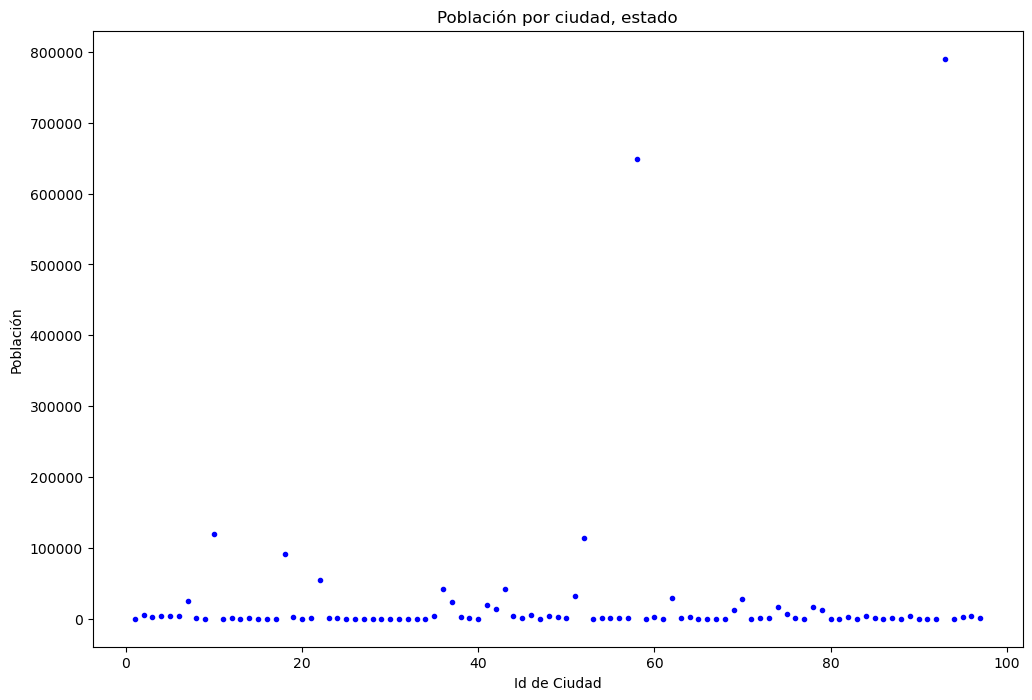

In [13]:
plt.figure(figsize=(12,8))
plt.plot(df['City_Key'],df['Latest_Recorded_Population'],'.', color='blue')
plt.title('Población por ciudad, estado')
plt.xlabel('Id de Ciudad')  
plt.ylabel('Población')  
plt.show()

In [14]:
# Como se hizo una limpieza del archivo, se guarda el nuevo.
df.to_csv(ruta+'dimension_city.csv', index=False)

### 3. Perfilamiento, limpieza y visualización de los datos customer.
A través de la librería pandas resalizamos la carga de datos del archivo "/Lab4/Muestra/dimension_customer.csv".

Se debe tener en cuenta no eliminar filas de Customer_Key ya que estas son llaves foráneas.

In [15]:
# Se cargan los datos. 
df=pd.read_csv(ruta+'dimension_customer.csv', encoding = "cp1252")

In [16]:
# Cantidad de datos y número de variables
df.shape

(403, 7)

In [17]:
df.dtypes

Customer_Key          int64
Customer             object
Bill_To_Customer     object
Category             object
Buying_Group         object
Primary_Contact      object
Postal_Code         float64
dtype: object

Se tienen como datos numéricos Customer_Key y Postal_Code, el resto es texto.

In [18]:
# Mostrar los datos
df.head()

,Customer_Key,Customer,Bill_To_Customer,Category,Buying_Group,Primary_Contact,Postal_Code
0,0,Unknown,NaN,NaN,NaN,NaN,NaN
1,1,Tailspin Toys (Head Office),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Waldemar Fisar,90410.0
2,2,Tailspin Toys (Sylvanite- MT),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Lorena Cindric,90216.0
3,3,Tailspin Toys (Peeples Valley- AZ),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Bhaargav Rambhatla,90205.0
4,4,Tailspin Toys (Medicine Lodge- KS),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Daniel Roman,90152.0


In [19]:
# Se elimina la primera fila que esta llena de nulos y se corrige el tipo de Postal_Code
df = df.drop([0])
df['Postal_Code'] = df['Postal_Code'].astype(int)
df.head()

,Customer_Key,Customer,Bill_To_Customer,Category,Buying_Group,Primary_Contact,Postal_Code
1,1,Tailspin Toys (Head Office),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Waldemar Fisar,90410
2,2,Tailspin Toys (Sylvanite- MT),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Lorena Cindric,90216
3,3,Tailspin Toys (Peeples Valley- AZ),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Bhaargav Rambhatla,90205
4,4,Tailspin Toys (Medicine Lodge- KS),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Daniel Roman,90152
5,5,Tailspin Toys (Gasport- NY),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Johanna Huiting,90261


In [20]:
# Resumen de los datos numéricos, customer key es un id entonces no sirve describirlo
df['Postal_Code'].describe()

count      402.000000
mean     90414.390547
std        233.078913
min      90005.000000
25%      90229.750000
50%      90400.500000
75%      90630.250000
max      90800.000000
Name: Postal_Code, dtype: float64

Ahora se revisan las columnas Bill_To_Customer, Buying_Group y Category.

In [21]:
df['Bill_To_Customer'].value_counts()

Tailspin Toys (Head Office)    201
Wingtip Toys (Head Office)     201
Name: Bill_To_Customer, dtype: int64

In [22]:
df['Buying_Group'].value_counts()

Tailspin Toys    201
Wingtip Toys     201
Name: Buying_Group, dtype: int64

In [23]:
df['Category'].value_counts()

Novelty Shop    402
Name: Category, dtype: int64

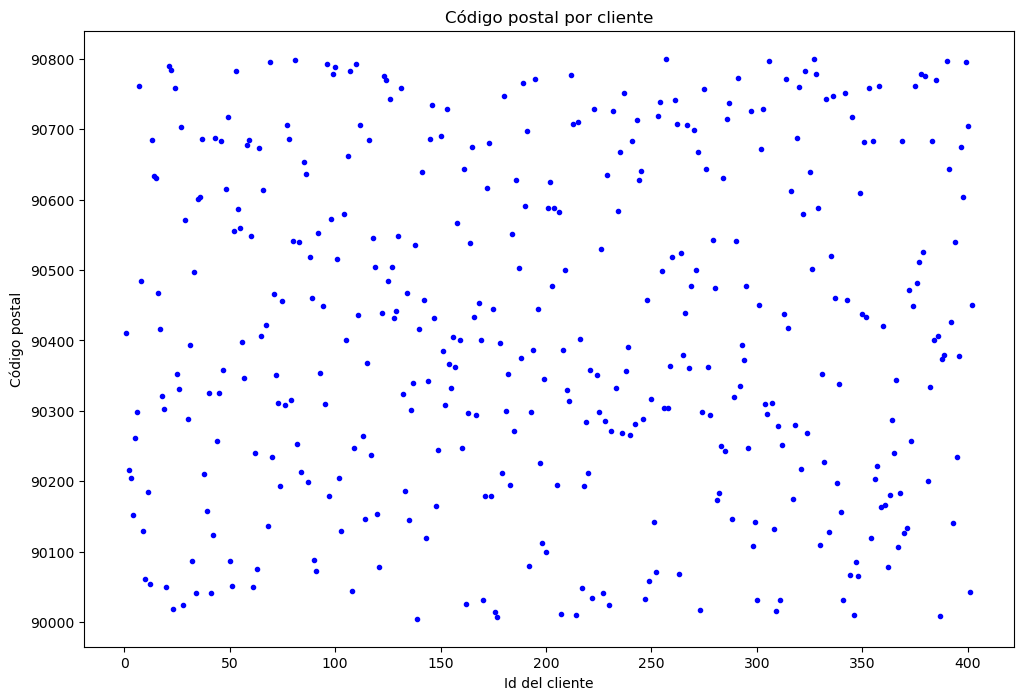

In [24]:
plt.figure(figsize=(12,8))
plt.plot(df['Customer_Key'],df['Postal_Code'],'.', color='blue')
plt.title('Código postal por cliente')
plt.xlabel('Id del cliente')  
plt.ylabel('Código postal')  
plt.show()

In [25]:
# Como se hizo una limpieza del archivo, se guarda el nuevo.
df.to_csv(ruta+'dimension_customer.csv', encoding = "cp1252", index=False)

### 4. Perfilamiento, limpieza y visualización de los datos date.
A través de la librería pandas resalizamos la carga de datos del archivo "/Lab4/Muestra/dimension_date.csv".

Se debe tener en cuenta no eliminar filas de Date_key ya que es llave foránea.

In [26]:
# Se cargan los datos. 
df=pd.read_csv(ruta+'dimension_date.csv')

In [27]:
# Cantidad de datos y número de variables
df.shape

(1461, 9)

In [28]:
df.dtypes

Date_key                 object
Day_Number                int64
Day_val                   int64
Month_val                object
Short_Month              object
Calendar_Month_Number     int64
Calendar_Year             int64
Fiscal_Month_Number       int64
Fiscal_Year               int64
dtype: object

Se tienen como datos tipo texto Date_key, Month_val y Short_Month, el resto son numéricos.

In [29]:
# Se modifica Date_key para mostrar la fecha apropiada.
df['Date_key'] = pd.to_datetime(df['Date_key'])
df.dtypes

Date_key                 datetime64[ns]
Day_Number                        int64
Day_val                           int64
Month_val                        object
Short_Month                      object
Calendar_Month_Number             int64
Calendar_Year                     int64
Fiscal_Month_Number               int64
Fiscal_Year                       int64
dtype: object

In [30]:
# Mostrar los datos
df.head()

,Date_key,Day_Number,Day_val,Month_val,Short_Month,Calendar_Month_Number,Calendar_Year,Fiscal_Month_Number,Fiscal_Year
0,2013-01-01,1,1,January,Jan,1,2013,3,2013
1,2013-01-02,2,2,January,Jan,1,2013,3,2013
2,2013-01-03,3,3,January,Jan,1,2013,3,2013
3,2013-01-04,4,4,January,Jan,1,2013,3,2013
4,2013-01-05,5,5,January,Jan,1,2013,3,2013


In [31]:
# Resumen de los datos numéricos aunque representen una fecha
df.describe()

,Day_Number,Day_val,Calendar_Month_Number,Calendar_Year,Fiscal_Month_Number,Fiscal_Year
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,15.729637,6.522930,2014.501027,6.518823,2014.668036
std,8.803105,8.803105,3.449884,1.118723,3.457247,1.179156
min,1.000000,1.000000,1.000000,2013.000000,1.000000,2013.000000
25%,8.000000,8.000000,4.000000,2014.000000,3.000000,2014.000000
50%,16.000000,16.000000,7.000000,2015.000000,7.000000,2015.000000
75%,23.000000,23.000000,10.000000,2016.000000,10.000000,2016.000000
max,31.000000,31.000000,12.000000,2016.000000,12.000000,2017.000000


In [32]:
# Se revisan los datos tipo fecha
df.Date_key.tail(10)

1451   2016-12-22
1452   2016-12-23
1453   2016-12-24
1454   2016-12-25
1455   2016-12-26
1456   2016-12-27
1457   2016-12-28
1458   2016-12-29
1459   2016-12-30
1460   2016-12-31
Name: Date_key, dtype: datetime64[ns]

Se revisan los valores de Month_val y Short_Month.

In [33]:
df['Month_val'].value_counts()

January      124
March        124
May          124
July         124
August       124
October      124
December     124
April        120
June         120
September    120
November     120
February     113
Name: Month_val, dtype: int64

In [34]:
df['Short_Month'].value_counts()

Jan    124
Mar    124
May    124
Jul    124
Aug    124
Oct    124
Dec    124
Apr    120
Jun    120
Sep    120
Nov    120
Feb    113
Name: Short_Month, dtype: int64

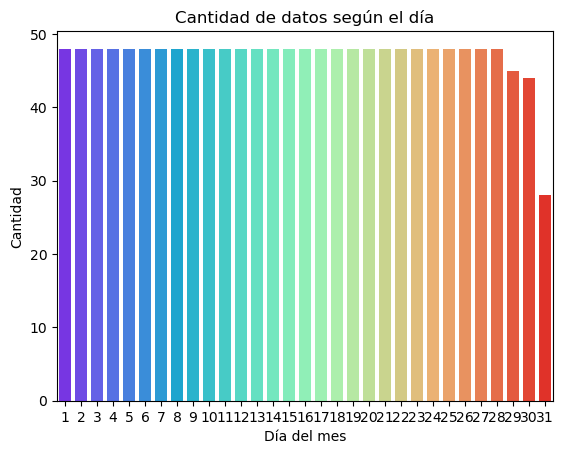

In [35]:
# Se visualizan los datos según el día
sns.countplot(x = "Day_val", data=df, palette="rainbow").set(
    title="Cantidad de datos según el día", xlabel="Día del mes", ylabel="Cantidad")
plt.show()

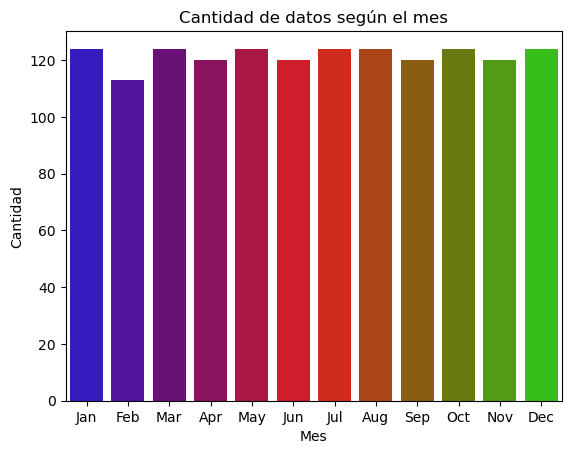

In [36]:
# Se visualizan los datos según el mes
sns.countplot(x='Short_Month', data=df, palette="brg").set(
    title="Cantidad de datos según el mes", xlabel="Mes", ylabel="Cantidad")
plt.show()

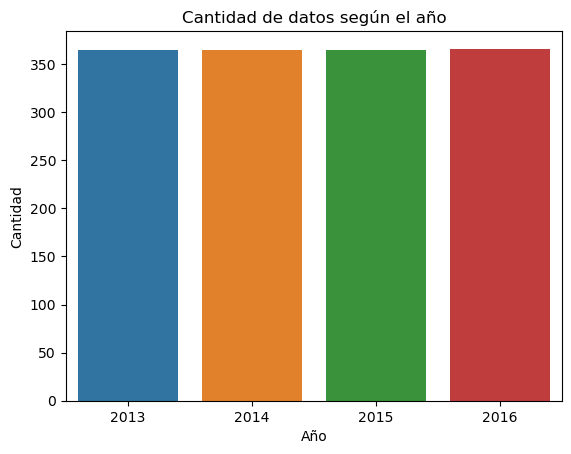

In [37]:
# Se visualizan los datos según el año
sns.countplot(x="Calendar_Year", data=df).set(
    title="Cantidad de datos según el año", xlabel="Año", ylabel="Cantidad")
plt.show()

In [38]:
# Como se hizo una limpieza del archivo, se guarda el nuevo.
df.to_csv(ruta+'dimension_date.csv', index=False)

### 5. Perfilamiento, limpieza y visualización de los datos employee.
A través de la librería pandas resalizamos la carga de datos del archivo "/Lab4/Muestra/dimension_employee.csv".

Se debe tener en cuenta no eliminar filas de employee y employee_key ya que estas son llaves foráneas.

In [39]:
# Se cargan los datos. 
df=pd.read_csv(ruta+'dimension_employee.csv')

In [40]:
# Cantidad de datos y número de variables
df.shape

(213, 4)

In [41]:
df.dtypes

Employee_Key       int64
Employee          object
Preferred_Name    object
Is_Salesperson      bool
dtype: object

Se tienen como datos numéricos Employee_Key, booleanos como Is_Salesperson y el resto es texto.

In [42]:
# Mostrar los datos
df.head()

,Employee_Key,Employee,Preferred_Name,Is_Salesperson
0,0,Unknown,NaN,False
1,1,Lily Code,Lily,True
2,2,Isabella Rupp,Isabella,False
3,3,Ethan Onslow,Ethan,False
4,4,Amy Trefl,Amy,True


In [43]:
# Se elimina la primera fila que esta llena de nulos.
df = df.drop([0])
df.head()

,Employee_Key,Employee,Preferred_Name,Is_Salesperson
1,1,Lily Code,Lily,True
2,2,Isabella Rupp,Isabella,False
3,3,Ethan Onslow,Ethan,False
4,4,Amy Trefl,Amy,True
5,5,Jai Shand,Jai,False


Se revisan los valores de Employee y Preferred_Name

In [44]:
df['Employee'].value_counts()

Lily Code             18
Jai Shand             17
Ethan Onslow          15
Hudson Hollinworth    15
Amy Trefl             14
Anthony Grosse        14
Taj Shand             14
Hudson Onslow         13
Stella Rosenhain      12
Jack Potter           12
Sophia Hinton         11
Alica Fatnowna        10
Piper Koch            10
Kayla Woodcock         9
Isabella Rupp          9
Henry Forlonge         7
Katie Darwin           6
Eva Muirden            3
Archer Lamble          3
Name: Employee, dtype: int64

In [45]:
df['Preferred_Name'].value_counts()

Hudson      28
Lily        18
Jai         17
Ethan       15
Amy         14
Anthony     14
Taj         14
Stella      12
Jack        12
Sophia      11
Alica       10
Piper       10
Kayla        9
Isabella     9
Henry        7
Katie        6
Eva          3
Archer       3
Name: Preferred_Name, dtype: int64

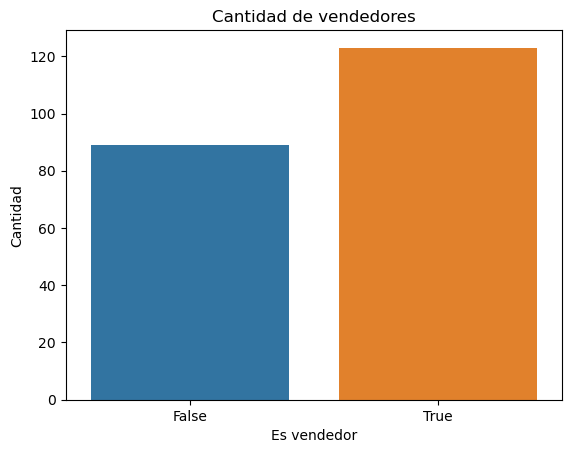

In [46]:
# Se visualizan los datos según el tipo de empleado
sns.countplot(x = "Is_Salesperson", data=df).set(
    title="Cantidad de vendedores", xlabel="Es vendedor", ylabel="Cantidad")
plt.show()

In [47]:
# Como se hizo una limpieza del archivo, se guarda el nuevo.
df.to_csv(ruta+'dimension_employee.csv', index=False)

### 6. Perfilamiento, limpieza y visualización de los datos stock_item.
A través de la librería pandas resalizamos la carga de datos del archivo "/Lab4/Muestra/dimension_stock_item.csv".

Se debe tener en cuenta no eliminar filas de stock_item y stock_item_key ya que estas son llaves foráneas.

In [48]:
# Se cargan los datos. 
df=pd.read_csv(ruta+'dimension_stock_item.csv', encoding = "cp1252")

In [49]:
# Cantidad de datos y número de variables
df.shape

(672, 14)

In [50]:
df.dtypes

Stock_Item_Key               int64
Stock_Item                  object
Color                       object
Selling_Package             object
Buying_Package              object
Brand                       object
Size_val                    object
Lead_Time_Days               int64
Quantity_Per_Outer           int64
Is_Chiller_Stock              bool
Tax_Rate                    object
Unit_Price                  object
Recommended_Retail_Price    object
Typical_Weight_Per_Unit     object
dtype: object

Se tienen como datos numéricos Stock_Item_Key, Lead_Time_Days y Quantity_Per_Outer, booleanos como Is_Chiller_Stock, el resto es texto.

In [51]:
# Se modifican Tax_Rate, Unit_Price, Recommended_Retail_Price y Typical_Weight_Per_Unit para interpretar 
# correctamente los precios.
df['Tax_Rate'] = df['Tax_Rate'].str.replace(',', '.').astype(float)
df['Unit_Price'] = df['Unit_Price'].str.replace(',', '.').astype(float)
df['Recommended_Retail_Price'] = df['Recommended_Retail_Price'].str.replace(',', '.').astype(float)
df['Typical_Weight_Per_Unit'] = df['Typical_Weight_Per_Unit'].str.replace(',', '.').astype(float)
df.dtypes

Stock_Item_Key                int64
Stock_Item                   object
Color                        object
Selling_Package              object
Buying_Package               object
Brand                        object
Size_val                     object
Lead_Time_Days                int64
Quantity_Per_Outer            int64
Is_Chiller_Stock               bool
Tax_Rate                    float64
Unit_Price                  float64
Recommended_Retail_Price    float64
Typical_Weight_Per_Unit     float64
dtype: object

In [52]:
# Mostrar los datos
df.head()

,Stock_Item_Key,Stock_Item,Color,Selling_Package,Buying_Package,Brand,Size_val,Lead_Time_Days,Quantity_Per_Outer,Is_Chiller_Stock,Tax_Rate,Unit_Price,Recommended_Retail_Price,Typical_Weight_Per_Unit
0,0,Unknown,NaN,NaN,NaN,NaN,NaN,0,0,False,0.0,0.0,0.00,0.00
1,1,Void fill 400 L bag (White) 400L,NaN,Each,Each,NaN,400L,14,10,False,14.0,50.0,74.75,1.00
2,2,Void fill 300 L bag (White) 300L,NaN,Each,Each,NaN,300L,14,10,False,14.0,37.5,56.06,0.75
3,3,Void fill 200 L bag (White) 200L,NaN,Each,Each,NaN,200L,14,10,False,14.0,25.0,37.38,0.50
4,4,Void fill 100 L bag (White) 100L,NaN,Each,Each,NaN,100L,14,10,False,14.0,12.5,18.69,0.25


In [53]:
# Se elimina la primera fila que esta llena de nulos.
df = df.drop([0])
df.head()

,Stock_Item_Key,Stock_Item,Color,Selling_Package,Buying_Package,Brand,Size_val,Lead_Time_Days,Quantity_Per_Outer,Is_Chiller_Stock,Tax_Rate,Unit_Price,Recommended_Retail_Price,Typical_Weight_Per_Unit
1,1,Void fill 400 L bag (White) 400L,NaN,Each,Each,NaN,400L,14,10,False,14.0,50.0,74.75,1.00
2,2,Void fill 300 L bag (White) 300L,NaN,Each,Each,NaN,300L,14,10,False,14.0,37.5,56.06,0.75
3,3,Void fill 200 L bag (White) 200L,NaN,Each,Each,NaN,200L,14,10,False,14.0,25.0,37.38,0.50
4,4,Void fill 100 L bag (White) 100L,NaN,Each,Each,NaN,100L,14,10,False,14.0,12.5,18.69,0.25
5,5,Air cushion machine (Blue),NaN,Each,Each,NaN,NaN,20,1,False,20.0,1899.0,2839.01,10.00


In [54]:
# Resumen de los datos numéricos
df.describe()

,Stock_Item_Key,Lead_Time_Days,Quantity_Per_Outer,Tax_Rate,Unit_Price,Recommended_Retail_Price,Typical_Weight_Per_Unit
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,336.000000,12.336811,7.132638,12.336811,46.673145,69.763815,1.927645
std,193.845299,2.848378,8.475355,2.848378,138.480702,207.032646,3.940181
min,1.000000,2.000000,1.000000,2.000000,0.660000,0.990000,0.050000
25%,168.500000,12.000000,1.000000,12.000000,13.000000,19.440000,0.150000
50%,336.000000,12.000000,1.000000,12.000000,18.000000,26.910000,0.350000
75%,503.500000,14.000000,12.000000,14.000000,32.000000,47.840000,0.700000
max,671.000000,20.000000,36.000000,20.000000,1899.000000,2839.010000,21.000000


In [55]:
df['Color'].value_counts()

Black          143
White           89
Blue            59
Steel Gray      22
Red             19
Light Brown     12
Gray             9
Yellow           7
Name: Color, dtype: int64

In [56]:
df['Brand'].value_counts()

Northwind    67
Name: Brand, dtype: int64

Ahora se revisan las columnas Size_val, Stock_item, Selling_Package y Buying_Package.

In [57]:
df['Size_val'].value_counts()

1/50 scale       38
XL               36
L                34
M                34
S                34
1/12 scale       29
10m              21
20m              21
50m              21
48mmx100m        21
48mmx75m         21
250g             14
5mm               9
1.5m              9
XXL               8
3XL               8
4XL               8
5XL               8
3XS               6
XS                6
9mm               6
18mm              6
325m              6
XXS               6
7XL               4
6XL               4
400L              3
300L              3
500x310x310mm     3
229x229x229mm     3
279x254x217mm     3
356x229x229mm     3
457x279x279mm     3
480x270x320mm     3
305x305x305mm     3
356x356x279mm     3
457x457x457mm     3
350x280x130mm     3
300x190x95mm      3
100L              3
200L              3
413x285x187mm     3
500g              2
Name: Size_val, dtype: int64

In [58]:
df['Stock_Item'].value_counts()

RC vintage American toy coupe with remote control (Black) 1/50 scale    5
RC vintage American toy coupe with remote control (Red) 1/50 scale      5
USB food flash drive - sushi roll                                       4
USB food flash drive - hamburger                                        4
USB food flash drive - hot dog                                          4
                                                                       ..
The Gu red shirt XML tag t-shirt (Black) M                              2
The Gu red shirt XML tag t-shirt (Black) L                              2
The Gu red shirt XML tag t-shirt (Black) XL                             2
The Gu red shirt XML tag t-shirt (Black) XXL                            2
White chocolate snow balls 250g                                         2
Name: Stock_Item, Length: 227, dtype: int64

In [59]:
df['Selling_Package'].value_counts()

Each      630
Packet     17
Bag        16
Pair        8
Name: Selling_Package, dtype: int64

In [60]:
df['Buying_Package'].value_counts()

Each      552
Carton     94
Packet     25
Name: Buying_Package, dtype: int64

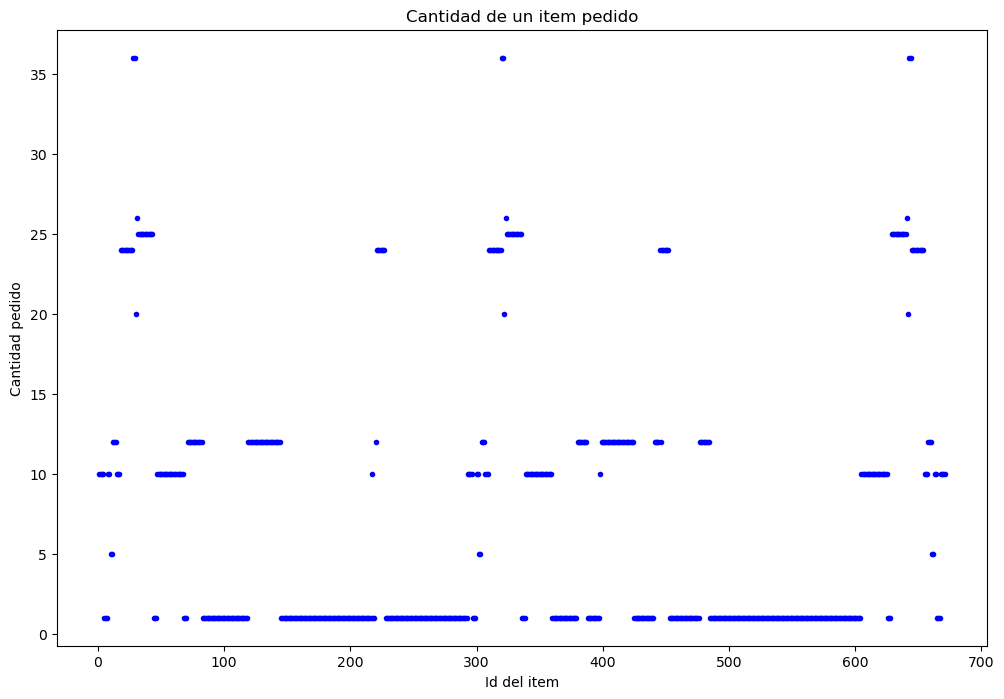

In [61]:
plt.figure(figsize=(12,8))
plt.plot(df['Stock_Item_Key'],df['Quantity_Per_Outer'],'.', color='blue')
plt.title('Cantidad de un item pedido')
plt.xlabel('Id del item')  
plt.ylabel('Cantidad pedido')  
plt.show()

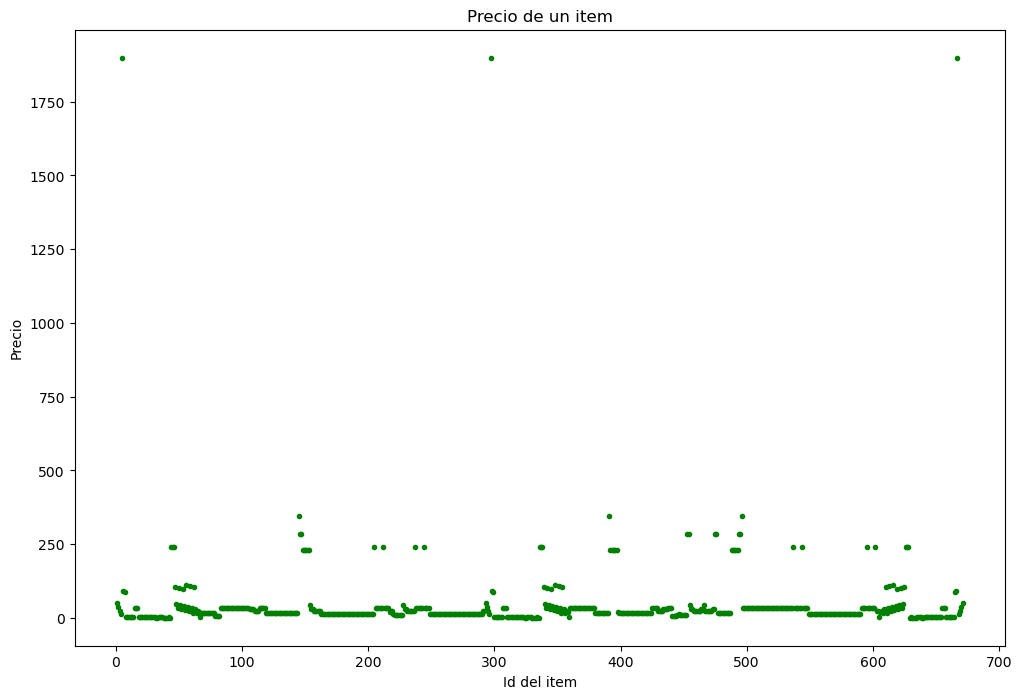

In [62]:
plt.figure(figsize=(12,8))
plt.plot(df['Stock_Item_Key'],df['Unit_Price'],'.', color='green')
plt.title('Precio de un item')
plt.xlabel('Id del item')  
plt.ylabel('Precio')  
plt.show()

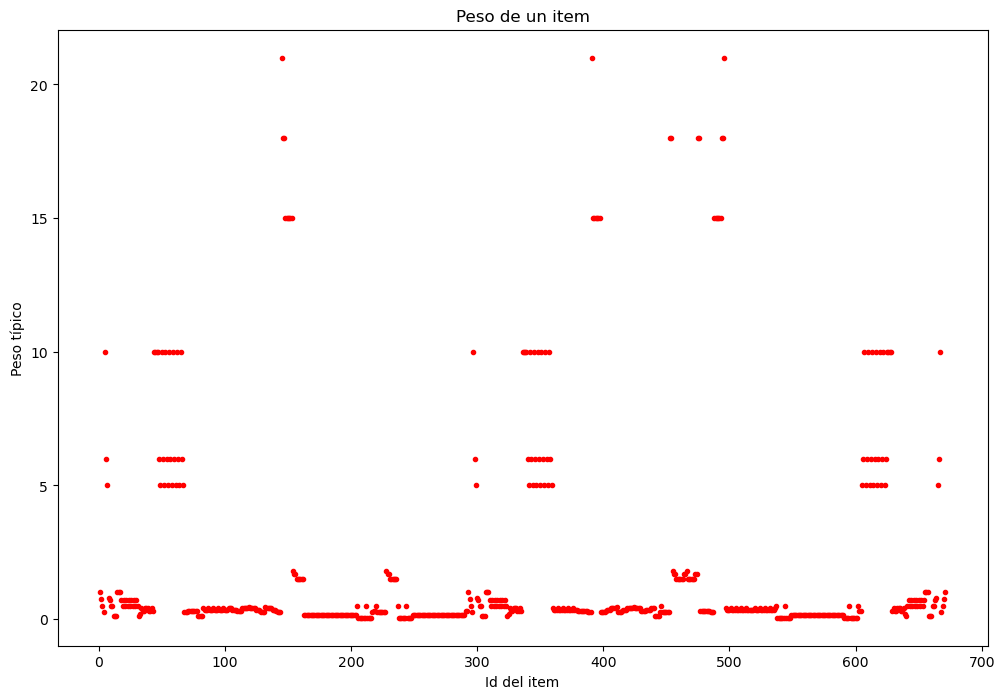

In [63]:
plt.figure(figsize=(12,8))
plt.plot(df['Stock_Item_Key'],df['Typical_Weight_Per_Unit'],'.', color='red')
plt.title('Peso de un item')
plt.xlabel('Id del item')  
plt.ylabel('Peso típico')  
plt.show()

In [64]:
# Como se hizo una limpieza del archivo, se guarda el nuevo.
df.to_csv(ruta+'dimension_stock_item.csv', encoding = "cp1252", index=False)

### 7. Perfilamiento, limpieza y visualización de los datos fact_order de muestra.
A través de la librería pandas resalizamos la carga de datos del archivo "/Lab4/Muestra/fact_order.csv".

De este solo se hará el perfilamiento de datos.

In [65]:
# Se cargan los datos. 
df=pd.read_csv(ruta+'fact_order.csv')

In [66]:
# Cantidad de datos y número de variables
df.shape

(1000, 15)

In [67]:
df.dtypes

order_key                int64
city_key                 int64
customer_key             int64
stock_item_key           int64
order_date_key          object
picked_date_key         object
salesperson_key          int64
picker_key               int64
package                 object
quantity                 int64
unit_price             float64
tax_rate                 int64
total_excluding_tax    float64
tax_amount             float64
total_including_tax    float64
dtype: object

Se tienen de texto como order_date_key, picked_date_key y package, el resto son datos numéricos.

In [68]:
# Se modifica Date_key para mostrar la fecha apropiada.
df['order_date_key'] = pd.to_datetime(df['order_date_key'])
df['picked_date_key'] = pd.to_datetime(df['picked_date_key'])
df.dtypes

order_key                       int64
city_key                        int64
customer_key                    int64
stock_item_key                  int64
order_date_key         datetime64[ns]
picked_date_key        datetime64[ns]
salesperson_key                 int64
picker_key                      int64
package                        object
quantity                        int64
unit_price                    float64
tax_rate                        int64
total_excluding_tax           float64
tax_amount                    float64
total_including_tax           float64
dtype: object

In [69]:
# Mostrar los datos
df.head()

,order_key,city_key,customer_key,stock_item_key,order_date_key,picked_date_key,salesperson_key,picker_key,package,quantity,unit_price,tax_rate,total_excluding_tax,tax_amount,total_including_tax
0,1,91,179,533,2014-02-05,2013-03-17,135,122,S,805,237.77,61,2245.39,305.40,7529.12
1,2,83,2,631,2015-11-17,2013-07-19,2,133,S,76,721.71,59,6585.70,135.12,8442.06
2,3,47,390,174,2015-04-29,2015-11-03,128,75,S,585,2866.71,9,8113.37,792.11,9934.49
3,4,8,218,157,2015-04-04,2014-12-03,84,191,S,878,4671.07,39,9109.56,668.65,6166.09
4,5,94,167,235,2015-01-26,2015-01-11,91,197,S,583,1950.68,24,9277.41,66.55,3885.52


In [70]:
# Descripción de los datos numéricos
df.describe()

,order_key,city_key,customer_key,stock_item_key,salesperson_key,picker_key,quantity,unit_price,tax_rate,total_excluding_tax,tax_amount,total_including_tax
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,48.813000,192.262000,333.841000,104.873000,110.407000,486.503000,2525.927420,35.455000,5067.421790,504.827390,5149.109840
std,288.819436,27.727222,111.002418,191.029411,60.875896,61.809399,290.902052,1420.203746,20.405155,2870.390154,280.309821,2829.449573
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,21.470000,1.000000,116.310000,50.180000,102.530000
25%,250.750000,24.000000,97.000000,175.000000,53.000000,56.000000,226.000000,1293.480000,18.000000,2544.482500,263.245000,2714.900000
50%,500.500000,50.000000,191.000000,336.000000,106.000000,115.000000,489.500000,2517.885000,35.500000,4992.265000,502.310000,5130.270000
75%,750.250000,73.250000,285.000000,502.000000,156.250000,165.000000,743.000000,3671.327500,54.000000,7634.672500,741.485000,7566.692500
max,1000.000000,95.000000,390.000000,660.000000,210.000000,210.000000,998.000000,4990.250000,70.000000,9995.490000,999.380000,9998.900000


Hay varios de estos datos que ya los perfilamos en las anteriores tablas, solo se revisa package.

In [71]:
df['package'].value_counts()

S     512
M     235
L     129
X      65
XL     59
Name: package, dtype: int64

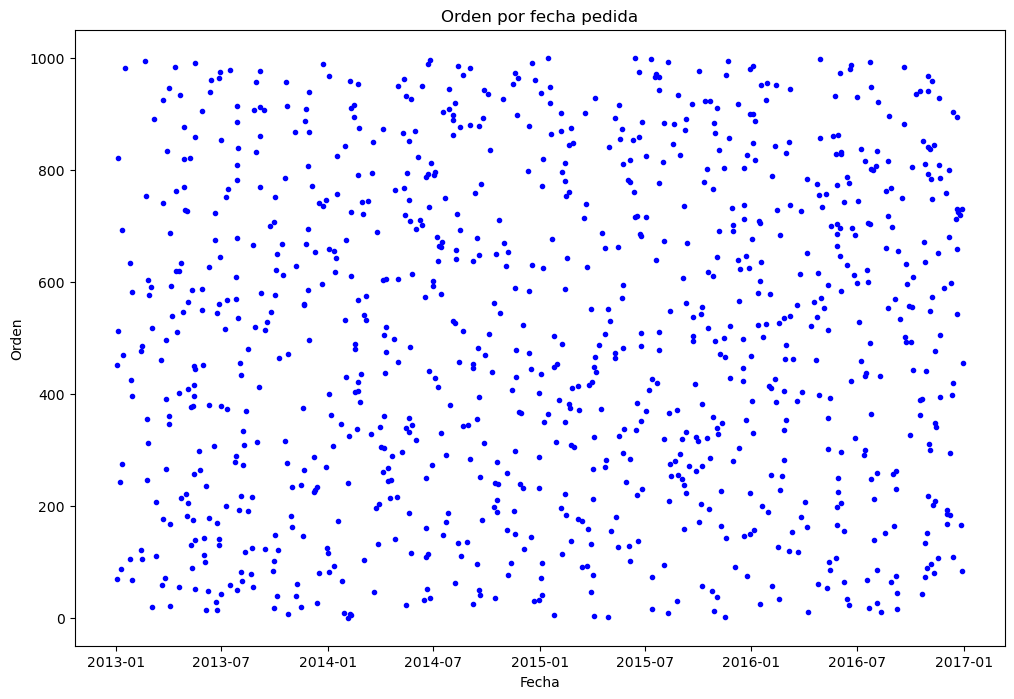

In [72]:
plt.figure(figsize=(12,8))
plt.plot(df['order_date_key'],df['order_key'],'.', color='blue')
plt.title('Orden por fecha pedida')
plt.xlabel('Fecha')  
plt.ylabel('Orden')  
plt.show()

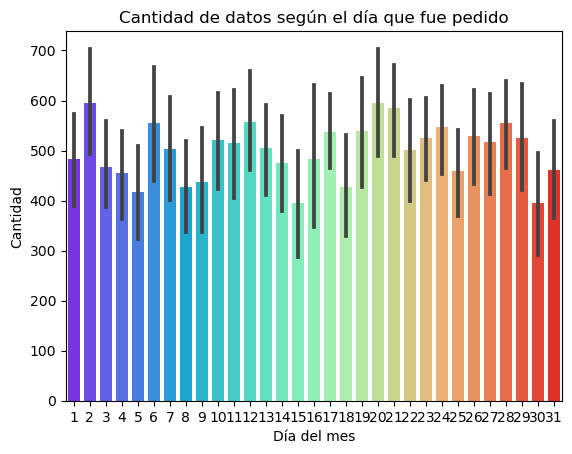

In [73]:
# Se visualizan los datos según el día
sns.barplot(x = pd.DatetimeIndex(df['order_date_key']).day, y=df['order_key'], palette="rainbow").set(
    title="Cantidad de datos según el día que fue pedido", xlabel="Día del mes", ylabel="Cantidad")
plt.show()

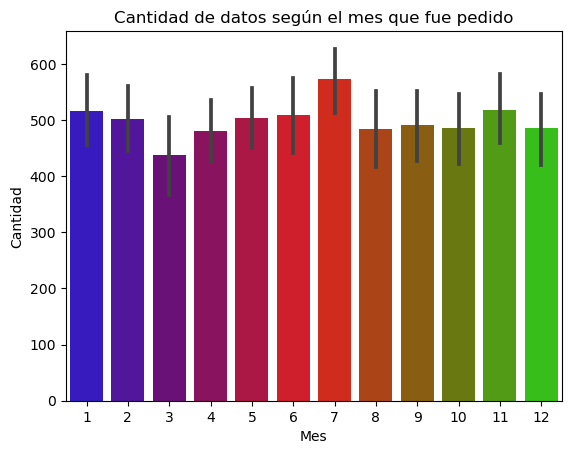

In [74]:
# Se visualizan los datos según el mes
sns.barplot(x = pd.DatetimeIndex(df['order_date_key']).month, y=df['order_key'], palette="brg").set(
    title="Cantidad de datos según el mes que fue pedido", xlabel="Mes", ylabel="Cantidad")
plt.show()

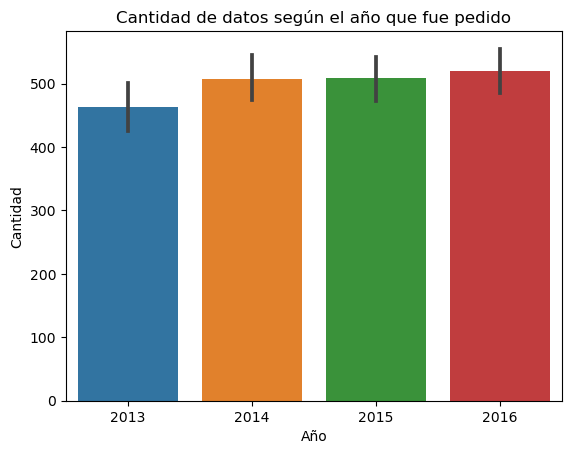

In [75]:
# Se visualizan los datos según el año
sns.barplot(x = pd.DatetimeIndex(df['order_date_key']).year, y=df['order_key']).set(
    title="Cantidad de datos según el año que fue pedido", xlabel="Año", ylabel="Cantidad")
plt.show()

In [76]:
# Como se hizo una limpieza del archivo, se guarda el nuevo.
df.to_csv(ruta+'fact_order.csv', index=False)